In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from DataHandlers.importer_snippets import biologic_mpt_voltammetry
from DataHandlers.LinReg import PolyReg
import os
plt.style.use("JGW-PPT")

In [8]:
# dir_name = r"C:\Users\jgage\OneDrive - Stanford\Jaramillo Group\EC-data\GC-Control-Submerged_JGW2-08"
dir_name = str(os.getcwd())
technique = 'CVA'


data_frames = {}
for file in os.listdir(dir_name):
    if file.endswith(".mpt"):
        if technique in str(file):
            path = os.path.join(dir_name, file)
            df = biologic_mpt_voltammetry(path)
            data_frames[file] = df
            # print(str(file)[:-4] + '.csv')
            # df.to_csv(str(path)[:-4] + '.csv')
            print(file)

1200rpm_JGW2-08-19_04_CVA_C02.mpt
1400rpm_JGW2-08-21_04_CVA_C02.mpt
1600rpm_JGW2-08-20_04_CVA_C02.mpt
400rpm_JGW2-08-16_04_CVA_C02.mpt
400rpm_JGW2-08-17_04_CVA_C02.mpt
800rpm_JGW2-08-18_04_CVA_C02.mpt


In [9]:
a = ['400rpm_JGW2-08-17_04_CVA_C02.mpt', '800rpm_JGW2-08-18_04_CVA_C02.mpt', '1200rpm_JGW2-08-19_04_CVA_C02.mpt',
     '1400rpm_JGW2-08-21_04_CVA_C02.mpt', '1600rpm_JGW2-08-20_04_CVA_C02.mpt']
rpm_series = []
for i in a:
    rpm_series.append(data_frames[i])

rpm_series[0].dtypes

Ewe/V              float64
<I>/mA             float64
time/s             float64
mode                 int64
ox/red               int64
error                int64
control changes      int64
Ns changes           int64
counter inc.         int64
control/V          float64
cycle number         int64
(Q-Qo)/C           float64
I Range              int64
<Ece>/V            float64
P/W                float64
Rcmp/Ohm           float64
Ewe-Ece/V          float64
dtype: object

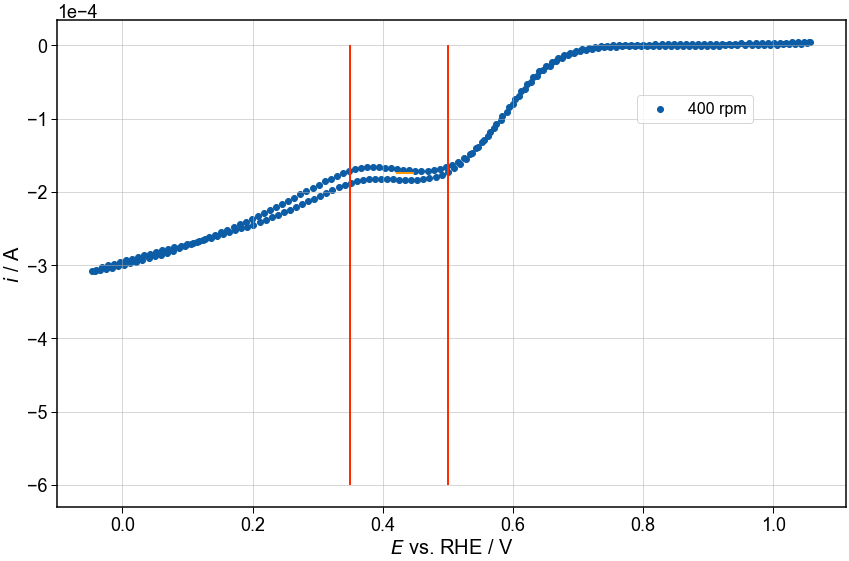

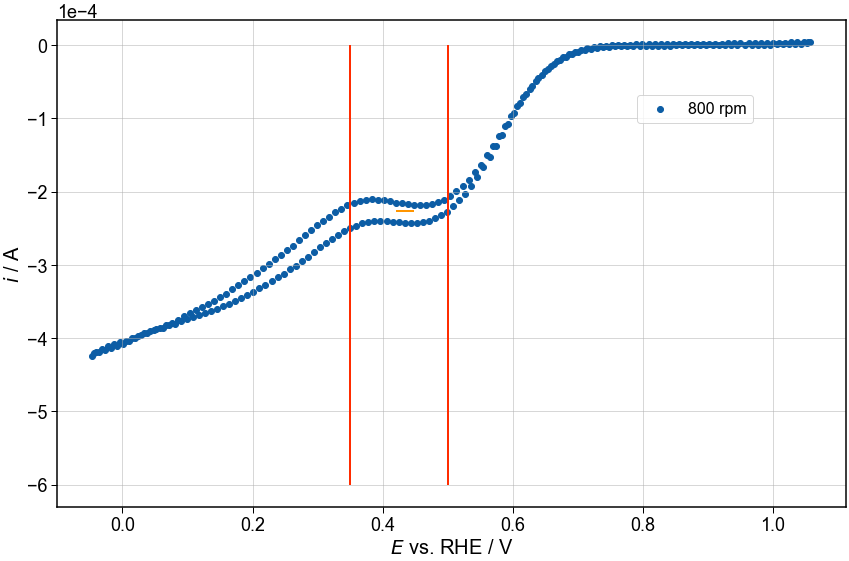

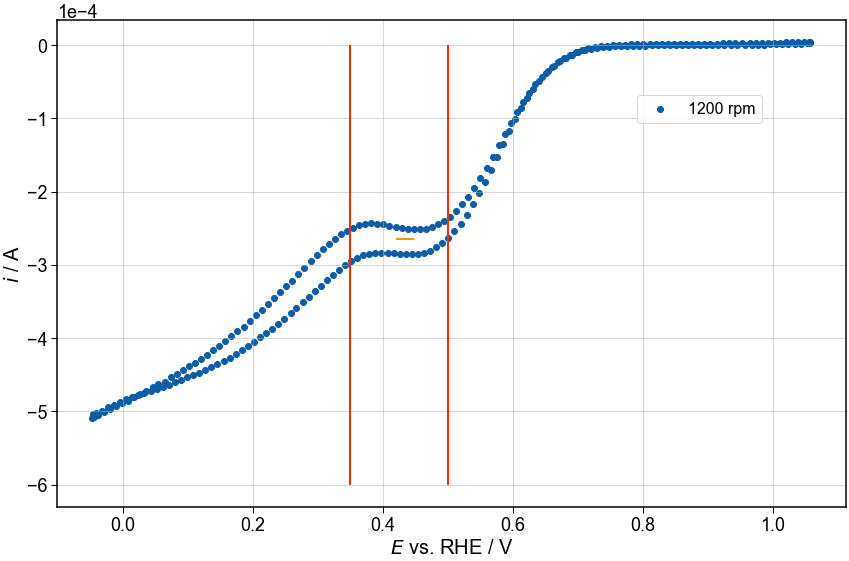

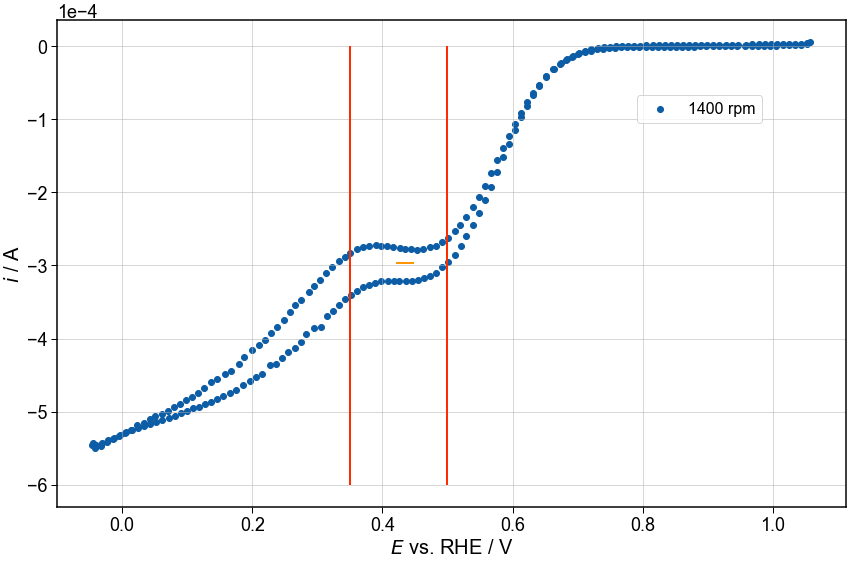

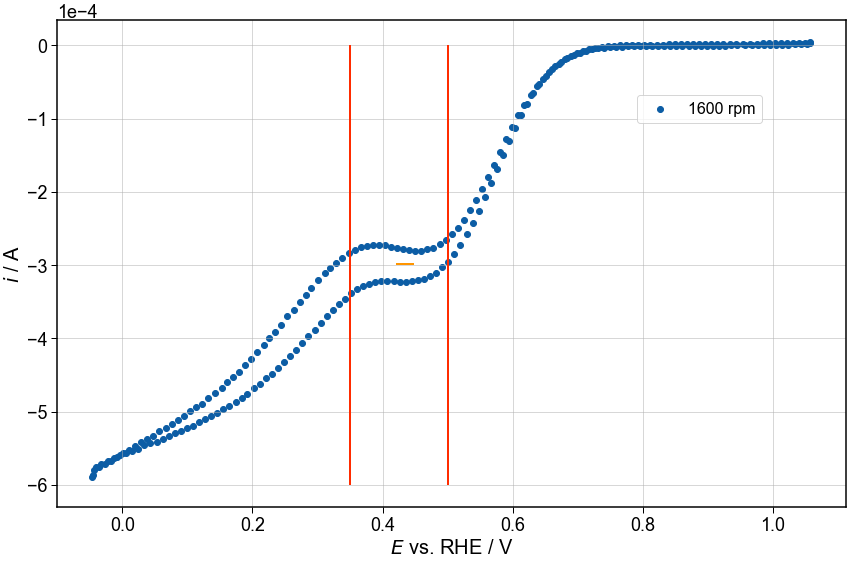

In [10]:
labels = ['400 rpm', '800 rpm', '1200 rpm', '1400 rpm', '1600 rpm']
ilc_est = []

for i in range(len(rpm_series)):
    fig, ax = plt.subplots()

    # Convert to RHE, current in Amps
    rpm_series[i]['E vs RHE'] = rpm_series[i]['Ewe/V'] + 0.958
    rpm_series[i]['<I>/A'] = rpm_series[i]['<I>/mA'] / 1000

    # Filter for cycle number
    x = rpm_series[i].loc[rpm_series[i]['cycle number'] == 2]['E vs RHE']
    y = rpm_series[i].loc[rpm_series[i]['cycle number'] == 2]['<I>/A']

    ax.scatter(x, y, label = labels[i], c='C00')

    # Check the middle region
    plt.vlines([.35, .50], -6.0e-4, 0, colors='C01')
    ilc_est.append(rpm_series[i].loc[rpm_series[i]['E vs RHE'].between(.36, .51)]['<I>/A'].mean())
    plt.scatter((.51+.36)/2, ilc_est[i], c='C03', marker='_', s=300)



    # ax.tick_params(axis='both', which='both', direction='in', right=True, top=True)
    ax.set_xlabel('$E$ vs. RHE / V')
    ax.set_ylabel('$i$ / A')
    ax.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
    fig.legend(loc=(0.75, 0.78))
    fig.tight_layout()
    plt.show()

coef_deg1      -0.000020
std_err_deg1    0.000001
coef_deg0      -0.000045
std_err_deg0    0.000014
r_squared       0.986397
s_y             0.000007
dtype: float64
-1.9965003802112006e-05(±1.3536445201586077e-06)
-4.5134359957601485e-05(±1.4395634655073641e-05)


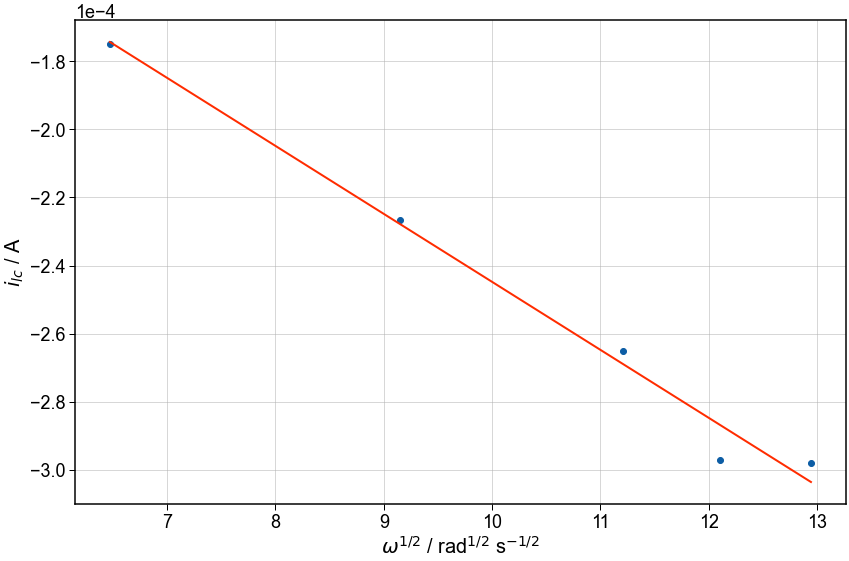

coef_deg1      -0.000020
std_err_deg1    0.000001
coef_deg0      -0.000045
std_err_deg0    0.000014
r_squared       0.986397
s_y             0.000007
dtype: float64

In [24]:
omega = np.array([400, 800, 1200, 1400, 1600])

x = (omega*2*np.pi / 60)**(1/2) # Convert to rad/s, then sqrt
y = np.array(ilc_est)

fit = PolyReg(x, y, 1)
print(fit.report())
print(str(fit.coef[0]) +'(±' + str(fit.std_err[0])+')', end='\n')
print(str(fit.coef[1]) +'(±' + str(fit.std_err[1])+')', end='\n')

fig, ax = plt.subplots()

ax.scatter(x, y, label='Data')
ax.plot(x, fit.eval(x), label='Fit', color='C01')
ax.set_xlabel('$\omega^{1/2}$ / rad$^{1/2}$ s$^{-1/2}$')
ax.set_ylabel('$i_{lc}$ / A')
ax.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
# fig.legend(loc=(0.75, 0.78))
fig.tight_layout()
plt.show()
# fig.savefig(os.path.join(dir_name, 'ilc-omega0.5.png'))

fit.report()

In [26]:
df = pd.DataFrame({'omega':(omega*2*np.pi / 60), 'ilc': ilc_est})
df['omega0.5'] = np.sqrt(df['omega'])
df.to_excel('omega-series_GC-Control-Submerged.xlsx')
df

,omega,ilc,omega0.5
0,41.887902,-0.000175,6.472086
1,83.775804,-0.000227,9.152912
2,125.663706,-0.000265,11.209982
3,146.607657,-0.000297,12.108165
4,167.551608,-0.000298,12.944173


coef_deg1      -31330.442386
std_err_deg1     1579.551559
coef_deg0        -912.057854
std_err_deg0      167.993081
r_squared           0.992432
s_y                99.412790
dtype: float64


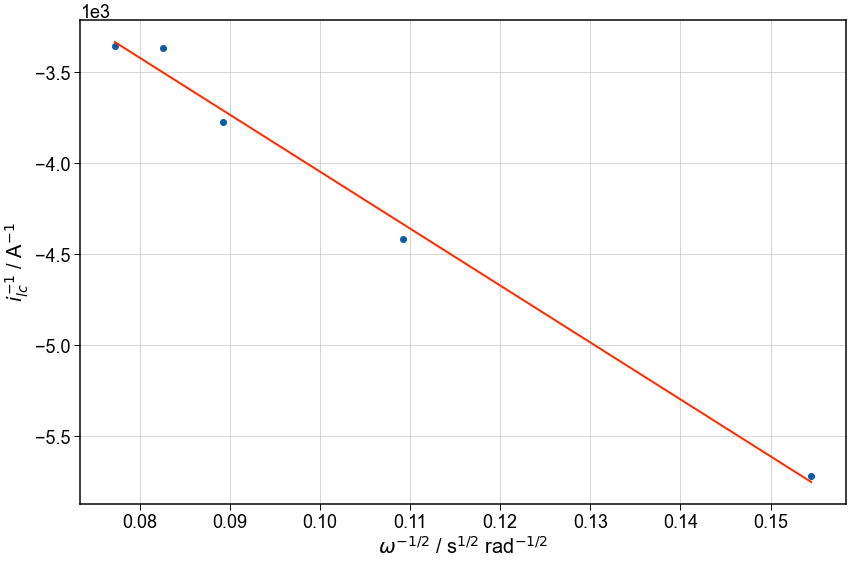

In [13]:
omega = np.array([400, 800, 1200, 1400, 1600])

x = (omega*2*np.pi / 60)**(-1/2) # Convert to rad/s, then sqrt
y = np.array(ilc_est)**-1

fit = PolyReg(x, y, 1)
print(fit.report())

fig, ax = plt.subplots()

ax.scatter(x, y, label='Data')
ax.plot(x, fit.eval(x), label='Fit', color='C01')
ax.set_xlabel('$\omega^{-1/2}$ / s$^{1/2}$ rad$^{-1/2}$')
ax.set_ylabel('$i_{lc}^{-1}$ / A$^{-1}$')
ax.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
# fig.legend(loc=(0.75, 0.78))
fig.tight_layout()
plt.show()
fig.savefig(os.path.join(dir_name, 'ilc-1_omega-0.5.png'))